In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras


In [33]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "fabeeha123",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

Connection to DB established!


In [4]:
cur=con.cursor()

# Q1:division/district/year/month wise total_sale_price joining fact table and respective dimension table 

# District

In [5]:
select_stmt="""SELECT store_dim.district as "District", SUM(fact_table.total_price) "Generated_revenue" 
FROM ecomdb_schema.fact_table 
JOIN ecomdb_schema.store_dim ON
store_dim.store_key = fact_table.store_key 
GROUP BY CUBE(store_dim.district) 
ORDER BY store_dim.district"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, select_stmt, fact_data.values)
cur.execute(select_stmt)
q2 = cur.fetchall()
q2


[('BAGERHAT', Decimal('1307651.00')),
 ('BANDARBAN', Decimal('995360.75')),
 ('BARGUNA', Decimal('869041.00')),
 ('BARISAL', Decimal('2897237.75')),
 ('BHOLA', Decimal('1012205.75')),
 ('BOGRA', Decimal('1716452.75')),
 ('BRAHMANBARIA', Decimal('1328234.25')),
 ('CHANDPUR', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ', Decimal('739447.50')),
 ('CHITTAGONG', Decimal('7292985.50')),
 ('CHUADANGA', Decimal('563909.75')),
 ('COMILLA', Decimal('2286898.25')),
 ("COX'S BAZAR", Decimal('1188128.75')),
 ('DHAKA', Decimal('23597621.00')),
 ('DINAJPUR', Decimal('1871005.75')),
 ('FARIDPUR', Decimal('1287383.75')),
 ('FENI', Decimal('847873.50')),
 ('GAIBANDHA', Decimal('997077.75')),
 ('GAZIPUR', Decimal('722286.25')),
 ('GOPALGANJ', Decimal('731312.75')),
 ('HABIGANJ', Decimal('1153998.00')),
 ('JAMALPUR', Decimal('1009760.00')),
 ('JESSORE', Decimal('1132590.50')),
 ('JHALOKATI', Decimal('570807.25')),
 ('JHENAIDAH', Decimal('869991.25')),
 ('JOYPURHAT', Decimal('735378.50')),
 ('KHAGRACHHARI'

In [6]:
district_wise_total_sale_price_df=pd.DataFrame(list(q2), columns=['District','Total sales'])
district_wise_total_sale_price_df

,District,Total sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25
63,THAKURGAON,729934.25


In [7]:
district_wise_total_sale_price_df ['District'] .isnull().sum()

1

In [8]:
district_wise_total_sale_price_df=district_wise_total_sale_price_df.dropna()
district_wise_total_sale_price_df

,District,Total sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
59,SIRAJGANJ,1295100.75
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25


# Division

In [9]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "fabeeha123",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [10]:
con = PostgresConnection().getConnection()
#curr = con.cursor()
select_stmts="""SELECT store_dim.division as "Division", SUM(fact_table.total_price) "Generated_revenue" 
FROM ecomdb_schema.fact_table 
JOIN ecomdb_schema.store_dim ON
store_dim.store_key = fact_table.store_key 
GROUP BY CUBE(store_dim.division) 
ORDER BY store_dim.division"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, select_stmt, fact_data.values)
cur.execute(select_stmts)
q2 = cur.fetchall()
q2


Connection to DB established!


[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [11]:
division_wise_total_sale_price_df=pd.DataFrame(list(q2), columns=['Division','Total sales'])
division_wise_total_sale_price_df

,Division,Total sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [12]:
division_wise_total_sale_price_df ['Division'] .isnull().sum()

1

In [13]:
division_wise_total_sale_price_df=division_wise_total_sale_price_df.dropna()
division_wise_total_sale_price_df

,Division,Total sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [72]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [77]:
df = division_wise_total_sale_price_df ['Division']

In [80]:
#fig=plt.figure (figsize=(7,7))
#df = pd.DataFrame()
#df = df.set_index(['division'])
df.plt.pie(x='Division', y='Total sales',(figsize=(10,7))
#plt.xlabel("Division")
#plt.ylabel("Total sales")
#plt.tittle("Division wise total sales")
#plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_2216/2307684010.py, line 4)

# Month

In [15]:
con = PostgresConnection().getConnection()
#curr = con.cursor()
select_stmts="""SELECT time_dim.month,SUM(fact_table.total_price) "Generated_revenue" 
FROM ecomdb_schema.fact_table 
JOIN ecomdb_schema.time_dim ON
time_dim.time_key = fact_table.time_key 
GROUP BY CUBE(time_dim.month) 
ORDER BY time_dim.month"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, select_stmt, fact_data.values)
cur.execute(select_stmts)
q2 = cur.fetchall()
q2


Connection to DB established!


[(Decimal('1'), Decimal('9042244.00')),
 (Decimal('2'), Decimal('8073877.50')),
 (Decimal('3'), Decimal('8939152.00')),
 (Decimal('4'), Decimal('8504634.75')),
 (Decimal('5'), Decimal('9078002.50')),
 (Decimal('6'), Decimal('8556853.00')),
 (Decimal('7'), Decimal('9046580.00')),
 (Decimal('8'), Decimal('8929475.25')),
 (Decimal('9'), Decimal('8724326.50')),
 (Decimal('10'), Decimal('8902783.75')),
 (Decimal('11'), Decimal('8680026.00')),
 (Decimal('12'), Decimal('8923480.50')),
 (None, Decimal('105401435.75'))]

In [16]:
month_wise_total_sale_price_df=pd.DataFrame(list(q2), columns=['Month','Total sales'])
month_wise_total_sale_price_df

,Month,Total sales
0,1,9042244.00
1,2,8073877.50
2,3,8939152.00
3,4,8504634.75
4,5,9078002.50
5,6,8556853.00
6,7,9046580.00
7,8,8929475.25
8,9,8724326.50
9,10,8902783.75


In [17]:
month_wise_total_sale_price_df ['Month'] .isnull().sum()

1

In [18]:
month_wise_total_sale_price_df=month_wise_total_sale_price_df.dropna()
month_wise_total_sale_price_df

,Month,Total sales
0,1,9042244.00
1,2,8073877.50
2,3,8939152.00
3,4,8504634.75
4,5,9078002.50
5,6,8556853.00
6,7,9046580.00
7,8,8929475.25
8,9,8724326.50
9,10,8902783.75


In [20]:
dtypes

NameError: name 'dtypes' is not defined

ValueError: could not convert string to float: 'Total Sales'

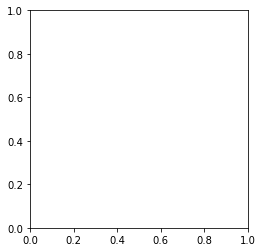

In [61]:
import matplotlib.pyplot as plt
import numpy as np
colors = plt.get_cmap('Blues')
# plot
fig, ax = plt.subplots()
ax.pie(x='Total Sales', colors=colors, radius=3, center=(5, 5),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       #ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [40]:
pip install matplotlib

In [50]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [64]:
import numpy as np

In [65]:
fig=plt.figure (figsize=(7,7))
df = pd.DataFrame()
#df = df.set_index(['division'])
df.plt.pie(division_wise_total_sale_price_df'sales', division_wise_total_sale_price_df'division')
plt.xlabel("Division")
plt.ylabel("Total sales")
plt.tittle("Division wise total sales")
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_2216/1481476565.py, line 4)

In [66]:
fig = plt.figure(figsize =(10, 7))
df.plt.pie(divisions, sales)
plt.tittle("Division wise total sales")
plt.show()

IndentationError: unexpected indent (Temp/ipykernel_2216/992954766.py, line 3)

# Year

In [8]:
con = PostgresConnection().getConnection()
#curr = con.cursor()
select_stmts="""SELECT time_dim.year,SUM(fact_table.total_price) 
FROM ecomdb_schema.fact_table 
JOIN ecomdb_schema.time_dim ON
time_dim.time_key = fact_table.time_key 
GROUP BY CUBE(time_dim.year) 
ORDER BY time_dim.year"""
cur = con.cursor()
cur.execute(select_stmts)
records= cur.fetchall()
records
year_wise_total_sale_price_df=pd.DataFrame(list(records), columns=['Year','Total sales'])
year_wise_total_sale_price_df

Connection to DB established!


,Year,Total sales
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25
7,2021,883772.25
8,None,105401435.75


# Q2:  customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

# Customer

In [11]:
con = PostgresConnection().getConnection()
#curr = con.cursor()
select_stmts="""SELECT name,SUM(f.total_price) 
FROM ecomdb_schema.fact_table f
JOIN ecomdb_schema.customer_dim c ON
c.customer_key = f.customer_key 
GROUP BY CUBE(c.name) 
ORDER BY c.name"""
cur = con.cursor()
cur.execute(select_stmts)
records= cur.fetchall()
records
name_wise_total_sale_price_df=pd.DataFrame(list(records), columns=['Name','Total sales'])
name_wise_total_sale_price_df

Connection to DB established!


,Name,Total sales
0,- ...,20643.50
1,aafreen fatima ...,11174.75
2,aafrin ...,22136.75
3,aafrin @ dolly ...,23529.75
4,aaftaab husan ...,9682.00
...,...,...
4533,मन्जू ...,10575.75
4534,माया ...,9862.50
4535,सरोज ...,11280.00
4536,सानिया ...,11010.00


# Bank

In [13]:
con = PostgresConnection().getConnection()
#curr = con.cursor()
select_stmts="""SELECT bank_name,SUM(f.total_price) 
FROM ecomdb_schema.fact_table f
JOIN ecomdb_schema.trans_dim t ON
t.payment_key = f.payment_key 
GROUP BY CUBE(t.bank_name) 
ORDER BY t.bank_name"""
cur = con.cursor()
cur.execute(select_stmts)
records= cur.fetchall()
records
bank_name_wise_total_sale_price_df=pd.DataFrame(list(records), columns=['Bank','Total sales'])
bank_name_wise_total_sale_price_df

Connection to DB established!


,Bank,Total sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [14]:
bank_name_wise_total_sale_price_df ['Bank'] .isnull().sum()

1

In [15]:
bank_name_wise_total_sale_price_df=bank_name_wise_total_sale_price_df.dropna()
bank_name_wise_total_sale_price_df

,Bank,Total sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


# Trans-Type

In [17]:
con = PostgresConnection().getConnection()
#curr = con.cursor()
select_stmts="""SELECT trans_type,SUM(f.total_price) 
FROM ecomdb_schema.fact_table f
JOIN ecomdb_schema.trans_dim t ON
t.payment_key = f.payment_key 
GROUP BY CUBE(t.trans_type) 
ORDER BY t.trans_type"""
cur = con.cursor()
cur.execute(select_stmts)
records= cur.fetchall()
records
trans_type_wise_total_sale_price_df=pd.DataFrame(list(records), columns=['Trans Type','Total sales'])
trans_type_wise_total_sale_price_df
trans_type_wise_total_sale_price_df ['Trans Type'] .isnull().sum()
trans_type_wise_total_sale_price_df=trans_type_wise_total_sale_price_df.dropna()
trans_type_wise_total_sale_price_df

Connection to DB established!


,Trans Type,Total sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50


# Q3:Total sales in Barisal

In [26]:
con = PostgresConnection().getConnection()
#curr = con.cursor()
select_stmts="""SELECT store_dim.division as "Division", SUM(fact_table.total_price) "Generated_revenue" 
FROM ecomdb_schema.fact_table 
JOIN ecomdb_schema.store_dim ON
store_dim.store_key = fact_table.store_key 
WHERE store_dim.division='BARISAL'
GROUP BY CUBE(store_dim.division) """
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, select_stmt, fact_data.values)
cur.execute(select_stmts)
records = cur.fetchall()
records
division_wise_total_sale_price_df=pd.DataFrame(list(q2), columns=['Division','Total sales'])
division_wise_total_sale_price_df

Connection to DB established!


,Division,Total sales
0,BARISAL,7520343.75
1,None,7520343.75


# Q4: Total sales in 2015

In [27]:
con = PostgresConnection().getConnection()
#curr = con.cursor()
select_stmts="""SELECT time_dim.year,SUM(fact_table.total_price) 
FROM ecomdb_schema.fact_table 
JOIN ecomdb_schema.time_dim ON
time_dim.time_key = fact_table.time_key 
WHERE time_dim.year=2015
GROUP BY CUBE(time_dim.year) """
cur = con.cursor()
cur.execute(select_stmts)
records= cur.fetchall()
records
year_wise_total_sale_price_df=pd.DataFrame(list(records), columns=['Year','Total sales'])
year_wise_total_sale_price_df


Connection to DB established!


,Year,Total sales
0,2015,15095720.25
1,None,15095720.25


# Q5: Total sales of Barisal in 2015

In [43]:
con = PostgresConnection().getConnection()
#curr = con.cursor()
select_stmts="""SELECT store_dim.division ,time_dim.year, SUM(fact_table.total_price)  
FROM ecomdb_schema.fact_table 
JOIN ecomdb_schema.store_dim ON
store_dim.store_key = fact_table.store_key 
JOIN ecomdb_schema.time_dim ON
time_dim.time_key = fact_table.time_key
WHERE store_dim.division='BARISAL'and
time_dim.year=2015
GROUP BY store_dim.division,time_dim.year """
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, select_stmt, fact_data.values)
cur.execute(select_stmts)
records = cur.fetchall()
records
division_year_wise_total_sale_price_df=pd.DataFrame(list(records), columns=['Division','Year','Total sales'])
division_year_wise_total_sale_price_df
#year_wise_total_sale_price_df=pd.DataFrame(list(records), columns=['Year','Total sales'])
#year_wise_total_sale_price_df


Connection to DB established!


,Division,Year,Total sales
0,BARISAL,2015,1076902.75


# Q6: For each store(item supplier), what are the top three products offered that are most often purchased

In [51]:
on = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts="""SELECT store_dim.store_key,item_dim.item_name, SUM(fact_table.quantity)  
FROM ecomdb_schema.fact_table 
JOIN ecomdb_schema.store_dim ON
store_dim.store_key = fact_table.store_key 
JOIN ecomdb_schema.item_dim ON
item_dim.item_key = fact_table.item_key
GROUP BY  (store_dim.store_key ,item_dim.item_name)
ORDER BY store_dim.store_key,SUM(fact_table.quantity) desc """
#cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
records
top_three_products_sale_quantity_df=pd.DataFrame(list(records), columns=['Store Key','Item Name','Sale_Quantity'])
#total_sale_quantity_df
top_three_products_sale_quantity_df=top_three_products_sale_quantity_df.dropna()
top_three_products_sale_quantity_df

Connection to DB established!


,Store Key,Item Name,Sale_Quantity
0,S0001,Pepsi - 12 oz cans,92
1,S0001,Muscle Milk Protein Shake Van. 11oz,90
2,S0001,Hefty Supreme Foam Plates 6 inch,78
3,S0001,Waterloo Sparkling Lime 12oz,70
4,S0001,Njoy Sugar Canister 22 oz,69
...,...,...,...
187109,S0099,Kind Bars Mini Variety Pack 0.7 oz,5
187110,S0099,Paper Plates 8.5 inch Ultra Strong,4
187111,S0099,Fuze Iced Tea,4
187112,S0099,Pringles Snak Stacks Variety,3


In [52]:
top_three_products_sale_quantity_df=top_three_products_sale_quantity_df.groupby('Store Key').head(3)
top_three_products_sale_quantity_df

,Store Key,Item Name,Sale_Quantity
0,S0001,Pepsi - 12 oz cans,92
1,S0001,Muscle Milk Protein Shake Van. 11oz,90
2,S0001,Hefty Supreme Foam Plates 6 inch,78
257,S0002,Planters Nut-trition 1.5 oz,83
258,S0002,Altoids Small Packs Variety,80
...,...,...,...
186597,S0098,Cliff Builders Protein Bar Variety Pack,84
186598,S0098,Pepsi - 12 oz cans,79
186855,S0099,Pepsi - 12 oz cans,93
186856,S0099,Diet Coke - 12 oz cans,87


# Q7: products have been sold through card or mobile since X days


In [56]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmts="""SELECT item_dim.item_name,trans_dim.trans_type, time_dim.t_date,SUM(fact_table.quantity)  
FROM ecomdb_schema.fact_table 
JOIN ecomdb_schema.item_dim ON
item_dim.item_key = fact_table.item_key 
JOIN ecomdb_schema.trans_dim ON
trans_dim.payment_key = fact_table.payment_key
JOIN ecomdb_schema.time_dim ON
time_dim.time_key = fact_table.time_key
WHERE trans_dim.trans_type='card'or trans_dim.trans_type='mobile'and time_dim.t_date> NOW()-INTERVAL'5 days' 
GROUP BY CUBE (item_dim.item_name,trans_dim.trans_type,time_dim.t_date)
ORDER BY time_dim.t_date DESC"""
#BY ()cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
records
n_days_products_sale_quantity_df=pd.DataFrame(list(records), columns=['Item Name','trans_type','Date-Time','Quantity'])
n_days_products_sale_quantity_df=n_days_products_sale_quantity_df.dropna()
n_days_products_sale_quantity_df

Connection to DB established!


,Item Name,trans_type,Date-Time,Quantity
520,"Dawn Ultra Dish Detergent, Original Scent",card,2021-12-01,6
521,Crunchy Granola Bars Oats & Honey,card,2021-12-01,9
522,Deluxe Mixed Nuts with Seasalt,card,2021-12-01,11
523,Dark Chocolate Mint Patties,card,2021-12-01,16
524,Community Coffee Dark Roast,card,2021-12-01,6
...,...,...,...,...
977280,Red Plastic Cups 18oz,card,2014-01-02,2
977281,"Sargento Bal. Breaks (fruit, nut, cheese)",card,2014-01-02,17
977282,Snyders Pretzels Minis,card,2014-01-02,12
977283,Seven Up - 12 oz cans,card,2014-01-02,11


# Q8: season(quarter) wise the worst for each product item

In [64]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmts="""SELECT time_dim.quarter,item_dim.item_name,store_dim.division,MIN(fact_table.total_price)  
FROM ecomdb_schema.fact_table 
JOIN ecomdb_schema.item_dim ON
item_dim.item_key = fact_table.item_key 
JOIN ecomdb_schema.store_dim ON
store_dim.store_key = fact_table.store_key
JOIN ecomdb_schema.time_dim ON
time_dim.time_key = fact_table.time_key
GROUP BY CUBE (time_dim.quarter,item_dim.item_name,store_dim.division)
ORDER BY MIN(fact_table.total_price) DESC"""
#BY ()cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
records


Connection to DB established!


[('Q2', 'Red Bull 12oz', 'RAJSHAHI', Decimal('55.0')),
 ('Q1', 'Red Bull 12oz', 'DHAKA', Decimal('55.0')),
 (None, 'Red Bull 12oz', 'RANGPUR', Decimal('55.0')),
 (None, 'Red Bull 12oz', 'RAJSHAHI', Decimal('55.0')),
 ('Q2', 'Red Bull 12oz', 'KHULNA', Decimal('55.0')),
 ('Q3', 'Red Bull 12oz', 'BARISAL', Decimal('55.0')),
 ('Q2', 'Red Bull 12oz', 'BARISAL', Decimal('55.0')),
 (None, 'Red Bull 12oz', 'CHITTAGONG', Decimal('55.0')),
 (None, 'Red Bull 12oz', 'KHULNA', Decimal('55.0')),
 ('Q3', 'Red Bull 12oz', 'DHAKA', Decimal('55.0')),
 ('Q1', 'Red Bull 12oz', 'RAJSHAHI', Decimal('55.0')),
 ('Q3', 'Red Bull 12oz', 'SYLHET', Decimal('55.0')),
 ('Q3', 'Red Bull 12oz', 'KHULNA', Decimal('55.0')),
 (None, 'Red Bull 12oz', 'SYLHET', Decimal('55.0')),
 ('Q4', 'Red Bull 12oz', 'RANGPUR', Decimal('55.0')),
 (None, 'Red Bull 12oz', 'DHAKA', Decimal('55.0')),
 ('Q4', 'Red Bull 12oz', 'CHITTAGONG', Decimal('55.0')),
 ('Q4', 'Red Bull 12oz', 'SYLHET', Decimal('55.0')),
 ('Q3', 'Red Bull 12oz', None, 

In [65]:
worst_products_total_sale_df=pd.DataFrame(list(records), columns=['Season','Item','Division','Total Sales'])
worst_products_total_sale_df=worst_products_total_sale_df.dropna()
worst_products_total_sale_df

,Season,Item,Division,Total Sales
0,Q2,Red Bull 12oz,RAJSHAHI,55.0
1,Q1,Red Bull 12oz,DHAKA,55.0
4,Q2,Red Bull 12oz,KHULNA,55.0
5,Q3,Red Bull 12oz,BARISAL,55.0
6,Q2,Red Bull 12oz,BARISAL,55.0
...,...,...,...,...
10389,Q3,Coffee-Mate Original Flavor Cold,BARISAL,6.0
10390,Q4,Coffee-Mate Original Flavor Cold,SYLHET,6.0
10391,Q1,"Blue Diamond Almonds Rstd, Sltd",BARISAL,6.0
10393,Q2,Coffee-Mate Original Flavor Cold,RAJSHAHI,6.0


# Avg Sales

In [66]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmts="""SELECT store_dim.store_key,time_dim.month,AVG(fact_table.total_price)  
FROM ecomdb_schema.fact_table 
JOIN ecomdb_schema.store_dim ON
store_dim.store_key = fact_table.store_key
JOIN ecomdb_schema.time_dim ON
time_dim.time_key = fact_table.time_key
GROUP BY CUBE (store_dim.store_key,time_dim.month)
ORDER BY AVG(fact_table.total_price) DESC"""
#BY ()cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
records

Connection to DB established!


[('S00717', Decimal('1'), Decimal('136.2500000000000000')),
 ('S00172', Decimal('11'), Decimal('135.7099056603773585')),
 ('S00327', Decimal('10'), Decimal('133.9608695652173913')),
 ('S00238', Decimal('10'), Decimal('133.8863636363636364')),
 ('S0054', Decimal('1'), Decimal('132.2702020202020202')),
 ('S00320', Decimal('11'), Decimal('131.8019801980198020')),
 ('S00130', Decimal('2'), Decimal('131.2500000000000000')),
 ('S00524', Decimal('11'), Decimal('131.0871559633027523')),
 ('S00385', Decimal('4'), Decimal('131.0750000000000000')),
 ('S00704', Decimal('11'), Decimal('130.8508403361344538')),
 ('S00147', Decimal('5'), Decimal('130.2605042016806723')),
 ('S00360', Decimal('5'), Decimal('130.1310483870967742')),
 ('S0050', Decimal('1'), Decimal('129.9678030303030303')),
 ('S00484', Decimal('11'), Decimal('129.8781512605042017')),
 ('S00451', Decimal('4'), Decimal('129.7139423076923077')),
 ('S00684', Decimal('2'), Decimal('129.7038834951456311')),
 ('S00474', Decimal('4'), Decimal('

In [67]:
Avg_sale_df=pd.DataFrame(list(records), columns=['Store Key','Month','Total Avg Sales'])
Avg_sale_df=Avg_sale_df.dropna()
Avg_sale_df

,Store Key,Month,Total Avg Sales
0,S00717,1,136.2500000000000000
1,S00172,11,135.7099056603773585
2,S00327,10,133.9608695652173913
3,S00238,10,133.8863636363636364
4,S0054,1,132.2702020202020202
...,...,...,...
9446,S00538,6,82.6799065420560748
9447,S0078,1,82.4547619047619048
9448,S00269,12,79.0474137931034483
9449,S00617,9,78.2598039215686275
